In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

warnings.simplefilter('ignore')

In [12]:
df = pd.read_csv("Data/final_clustered.csv")
df = df.drop("Unnamed: 0",axis=1)

In [13]:
df.head()

,new_clusters,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0_2_1,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0_2_2,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0_2_1,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0_2_2,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0_2_1,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


### Data preprocessing and cleaning

#### Like in the previous clustering we will be dropping the following columns:
- Player
- Nation
- Pos
- Squad
- Comp
- Age
- Born
- MP
- Starts
- Min
- 90s

### Encoding Position column

In [15]:
label_encoder = LabelEncoder()

# Encode the "Pos" column
df['Pos_Encoded'] = label_encoder.fit_transform(df['Pos'])

encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded mapping:")
for key, value in encoded_mapping.items():
    print(f"{value}: {key}")

Encoded mapping:
0: DF
1: DF,FW
2: DF,MF
3: FW
4: FW,DF
5: FW,MF
6: GK
7: GK,MF
8: MF
9: MF,DF
10: MF,FW


### Encoding clusters as they are not named consistently

In [16]:
label_encoder = LabelEncoder()

# Encode the "Pos" column
df['Cluster_encoded'] = label_encoder.fit_transform(df['new_clusters'])

encoded_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

print("Encoded mapping:")
for key, value in encoded_mapping.items():
    print(f"{value}: {key}")

Encoded mapping:
0: 0_0_0
1: 0_0_1
2: 0_0_2
3: 0_0_3
4: 0_1_0
5: 0_1_1
6: 0_1_2
7: 0_1_3
8: 0_2_0
9: 0_2_1
10: 0_2_2
11: 0_2_3
12: 0_2_4
13: 0_3_cluster_11
14: 0_4_0
15: 0_4_1
16: 0_4_2
17: 10_0_cluster_2
18: 10_1_cluster_1
19: 10_2_cluster_21
20: 10_3_0
21: 10_3_1
22: 10_3_2
23: 1_0_cluster_15
24: 1_1_cluster_5
25: 2_0_cluster_6
26: 2_1_cluster_3
27: 2_2_cluster_19
28: 3_0_0
29: 3_0_1
30: 3_0_2
31: 3_1_0
32: 3_1_1
33: 3_2_cluster_8
34: 3_3_cluster_12
35: 4_0_cluster_9
36: 4_1_cluster_20
37: 5_0_0
38: 5_0_1
39: 5_0_2
40: 5_0_3
41: 5_0_4
42: 5_0_5
43: 5_1_0
44: 5_1_1
45: 5_1_2
46: 5_1_3
47: 6_0_0
48: 6_0_1
49: 6_0_2
50: 6_0_3
51: 6_0_4
52: 6_1_cluster_17
53: 6_2_cluster_7
54: 6_3_0
55: 6_3_1
56: 6_3_2
57: 8_0_0
58: 8_0_1
59: 8_0_2
60: 8_0_3
61: 8_1_cluster_14
62: 8_2_0
63: 8_2_1
64: 8_2_2
65: 8_2_3
66: 8_3_cluster_16
67: 9_0_cluster_4
68: 9_1_cluster_10
69: 9_2_cluster_18
70: 9_3_cluster_13


In [19]:
df1 = df.drop(['Player', 'Nation', 'Squad', 'Comp', 'Born', 'MP',
       'Starts', 'Min', '90s','Pos','new_clusters'], axis=1)
df1.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded,Cluster_encoded
0,29.0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,33.3,...,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,0,9
1,32.0,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,33.3,...,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,0,10
2,24.0,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,23.1,...,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,0,9
3,34.0,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,22.2,...,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,0,10
4,32.0,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.0,...,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,0,9


### Let us check the number of values in each clusters

In [20]:
df1.replace('#DIV/0!', 0, inplace=True)
df1.fillna(0, inplace=True)
print(df1.isnull().sum())

Age                    0
Ast/90                 0
npG/90                 0
npG+A/90               0
xA/90                  0
                      ..
PassesReceived/90      0
PassRec%               0
ProgPassReceived/90    0
Pos_Encoded            0
Cluster_encoded        0
Length: 120, dtype: int64


### Scaling the dataset

In [24]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1.drop(['Pos_Encoded','Cluster_encoded'], axis=1))
scaled_df = pd.DataFrame(scaled_data, columns=df1.drop(['Pos_Encoded','Cluster_encoded'], axis=1).columns)
scaled_df['Pos_Encoded'] = df1['Pos_Encoded']
scaled_df['Cluster_encoded'] = df1['Cluster_encoded']
scaled_df.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded,Cluster_encoded
0,0.690476,0.006112,0.000000,0.006112,0.007030,0.010657,0.017575,0.0455,0.030,0.333,...,0.0760,0.046,0.022000,0.027000,0.352500,0.327500,0.928,0.0468,0,9
1,0.761905,0.000000,0.043062,0.011002,0.001757,0.008881,0.010545,0.0235,0.016,0.333,...,0.0125,0.003,0.008333,0.015667,0.365000,0.354167,0.970,0.0044,0,10
2,0.571429,0.000000,0.000000,0.000000,0.000000,0.014210,0.015817,0.0465,0.021,0.231,...,0.0035,0.000,0.004667,0.002333,0.280833,0.274167,0.977,0.0000,0,9
3,0.809524,0.000000,0.033493,0.008557,0.005272,0.008881,0.014060,0.0330,0.015,0.222,...,0.0330,0.000,0.007333,0.000000,0.290000,0.278333,0.960,0.0118,0,10
4,0.761905,0.003667,0.000000,0.003667,0.005272,0.005329,0.010545,0.0130,0.000,0.000,...,0.0510,0.003,0.015000,0.008667,0.424167,0.412500,0.973,0.0140,0,9


In [25]:
scaled_df.Cluster_encoded.value_counts()

Cluster_encoded
58    179
32    167
9     157
62    157
64    100
     ... 
52      1
69      1
27      1
36      1
19      1
Name: count, Length: 71, dtype: int64

In [40]:
from imblearn.over_sampling import RandomOverSampler

# Create RandomOverSampler instance
ros = RandomOverSampler()

X = scaled_df.drop('Cluster_encoded', axis=1)
y = scaled_df['Cluster_encoded']

X_resampled, y_resampled = ros.fit_resample(X, y)

df_sampled = pd.concat([X_resampled, y_resampled], axis=1)
df_sampled.head()

,Age,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,SoT%,...,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_Encoded,Cluster_encoded
0,0.690476,0.006112,0.000000,0.006112,0.007030,0.010657,0.017575,0.0455,0.030,0.333,...,0.0760,0.046,0.022000,0.027000,0.352500,0.327500,0.928,0.0468,0,9
1,0.761905,0.000000,0.043062,0.011002,0.001757,0.008881,0.010545,0.0235,0.016,0.333,...,0.0125,0.003,0.008333,0.015667,0.365000,0.354167,0.970,0.0044,0,10
2,0.571429,0.000000,0.000000,0.000000,0.000000,0.014210,0.015817,0.0465,0.021,0.231,...,0.0035,0.000,0.004667,0.002333,0.280833,0.274167,0.977,0.0000,0,9
3,0.809524,0.000000,0.033493,0.008557,0.005272,0.008881,0.014060,0.0330,0.015,0.222,...,0.0330,0.000,0.007333,0.000000,0.290000,0.278333,0.960,0.0118,0,10
4,0.761905,0.003667,0.000000,0.003667,0.005272,0.005329,0.010545,0.0130,0.000,0.000,...,0.0510,0.003,0.015000,0.008667,0.424167,0.412500,0.973,0.0140,0,9


In [26]:
from sklearn.model_selection import train_test_split

## separating train and test data

X = scaled_df.drop(['Cluster_encoded'],axis=1)
y = scaled_df['Cluster_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

lr = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = [lr, svc, dt, rf]
scores = []

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    prec = precision_score(y_test, y_pred, average='macro') * 100
    rec = recall_score(y_test, y_pred, average='macro') * 100
    f1 = f1_score(y_test, y_pred, average='macro') * 100
    scores.append([acc, prec, rec, f1])

In [28]:
scores_df = pd.DataFrame(columns=['Model'], data=['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest'])
scores_df = pd.concat([scores_df, pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1'])], axis=1)
scores_df

,Model,Accuracy,Precision,Recall,F1
0,Logistic Regression,21.592920,6.478876,11.337060,7.378446
1,SVC,23.008850,4.014865,12.497437,5.491458
2,Decision Tree,16.283186,12.849101,12.462441,11.417151
3,Random Forest,19.823009,8.739855,10.562030,8.196634


In [13]:
rf2 = RandomForestClassifier()
rf2.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 4, 12,  8,  0,  4,  9,  1,  8,  7,  4,  4,  4,  4,  2,  7,  2,  7,
        4, 12,  6,  4,  9,  2, 12,  7,  9,  4,  4,  8,  8,  6,  4, 10,  6,
        7,  1,  6, 14,  6,  2,  4,  6, 10,  5,  2,  2,  2,  7,  8,  4,  8,
        2, 10,  4, 12,  7,  8,  1,  8, 12,  7,  4,  7,  9, 12,  6,  6, 10,
        7,  8,  7, 12,  2,  5,  5,  8, 10, 12, 12,  8,  7, 10, 10,  2, 10,
        5,  0,  6,  6,  6, 12, 12,  2,  8, 12,  5, 12,  5,  5,  8,  8,  5,
       10,  2, 14,  4, 10, 12, 10,  5, 14, 10,  4,  2,  5, 14,  8,  7,  6,
        2,  9,  8,  9,  8, 12,  2,  8, 10,  4,  5, 12,  7,  9,  4, 12,  1,
       10,  6,  7,  5, 10,  5,  1,  2,  9,  6,  4,  4,  1,  2,  5,  9,  7,
        7,  5, 14,  2,  7,  2,  7, 10,  1,  2,  7,  4,  5,  6, 12,  7,  5,
        2,  6,  2,  2,  4,  9,  1,  8,  2,  4,  5,  2,  4,  5, 12,  5,  9,
        4,  2,  7,  5,  5,  4,  8, 12, 14,  4,  6,  2,  1,  4, 12,  2,  2,
        6,  4,  8,  2,  9,  4,  6,  8,  4,  6, 12,  2,  2,  4,  5,  7,  7,
        9,  5, 10,  5,  5

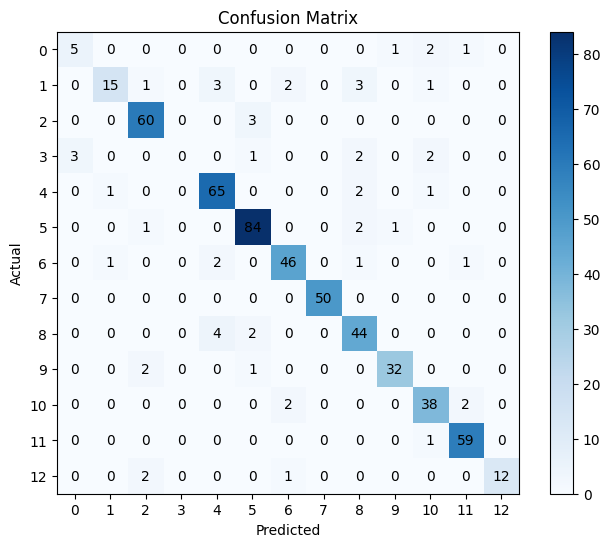

In [14]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Matplotlib's imshow
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cm))
plt.xticks(tick_marks, tick_marks)
plt.yticks(tick_marks, tick_marks)
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()